# Business Analytics und Künstliche Intelligenz

Prof. Dr. Jürgen Bock & Maximilian-Peter Radtke

---

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

C:\Users\bacco\AppData\Local\Temp\ipykernel_7592\3073706034.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Daten zur Kreditausfallwahrscheinlichkeit

In [2]:
default = pd.read_csv('data/Default.csv')

In [4]:
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [5]:
default['intercept'] = 1
default.default = default.default.map({'Yes': 1, 'No': 0})
default.student = default.student.map({'Yes': 1, 'No': 0})

In [6]:
default.head()

,default,student,balance,income,intercept
0,0,0,729.526495,44361.625074,1
1,0,1,817.180407,12106.134700,1
2,0,0,1073.549164,31767.138947,1
3,0,0,529.250605,35704.493935,1
4,0,0,785.655883,38463.495879,1


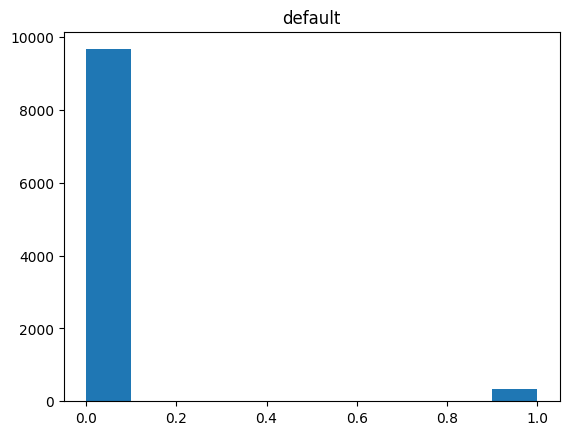

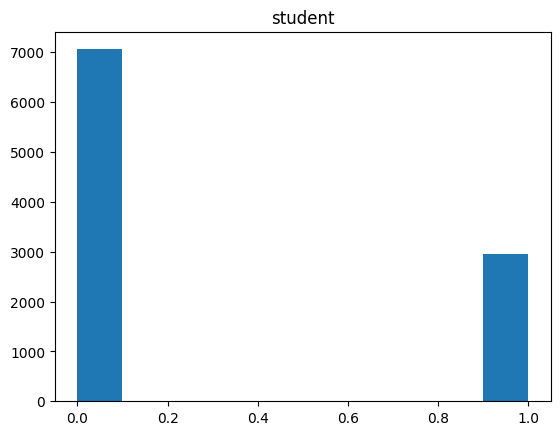

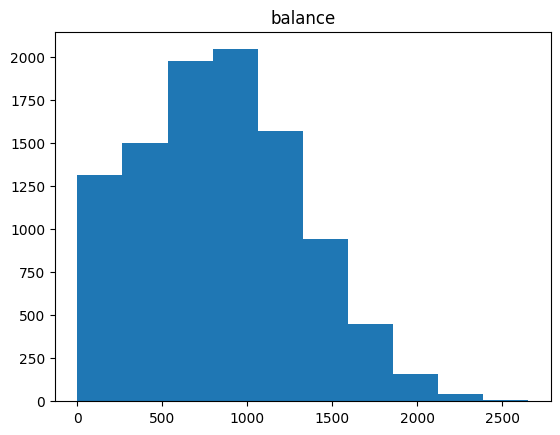

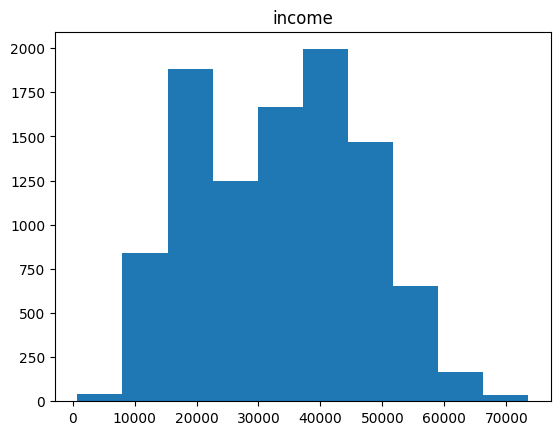

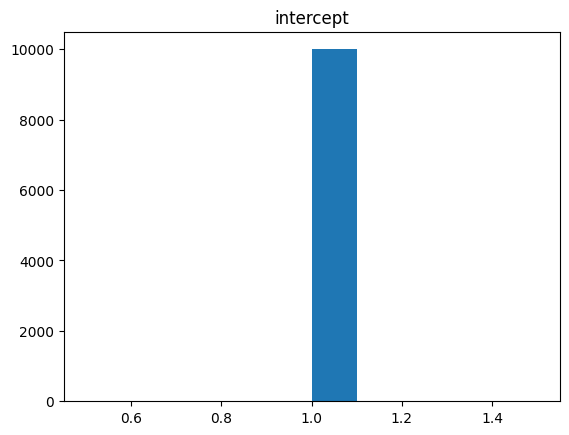

In [7]:
for col in default.columns:
    plt.title(col)
    plt.hist(default[col])
    plt.show()

## Logistische Regression

In [8]:
defaultMod = sm.Logit(default.default, default.loc[:,['balance', 'intercept']])
defaultRes = defaultMod.fit()
defaultRes.summary()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 Jan 2024   Pseudo R-squ.:                  0.4534
Time:                        15:36:01   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
balance        0.0055      0.000     24.952      0.000       0.005       0.006
intercept    -10.6513      0.361    -29.491      0.000     -11.359      -9.943
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [9]:
defaultStudMod = sm.Logit(default.default, default.loc[:,['student', 'intercept']])
defaultStudRes = defaultStudMod.fit()
defaultStudRes.summary()

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 Jan 2024   Pseudo R-squ.:                0.004097
Time:                        15:36:06   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                 0.0005416
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
student        0.4049      0.115      3.520      0.000       0.179       0.630
intercept     -3.5041      0.071    -49.554      0.000      -3.643      -3.366
==============================================================================
"""

In [10]:
defaultAllMod = sm.Logit(default.default, default.loc[:,['student', 'balance', 'income', 'intercept']])
defaultAllRes = defaultAllMod.fit()
defaultAllRes.summary()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Thu, 25 Jan 2024   Pseudo R-squ.:                  0.4619
Time:                        15:36:09   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
student       -0.6468      0.236     -2.738      0.006      -1.110      -0.184
balance        0.0057      0.000     24.737      0.000       0.005       0.006
income      3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
intercept    -10.8690      0.492    -22.079      0.000     -11.834      -9.904
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [11]:
defaultAllMod = sm.Logit(default.default, default.loc[:,['income', 'intercept']])
defaultAllRes = defaultAllMod.fit()
defaultAllRes.summary()

Optimization terminated successfully.
         Current function value: 0.145834
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 Jan 2024   Pseudo R-squ.:                0.001357
Time:                        15:39:20   Log-Likelihood:                -1458.3
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                   0.04652
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
income     -8.353e-06   4.21e-06     -1.985      0.047   -1.66e-05   -1.06e-07
intercept     -3.0941      0.146    -21.156      0.000      -3.381      -2.807
==============================================================================
"""

## Lineare Diskriminanzanalyse (LDA)

Statsmodels bietet [LDA]( 'https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html') leider nicht als Modell an. Daher nutzen wir hierfür das Paket [`scikit-learn`]('https://scikit-learn.org/stable/index.html'). Dieses Paket enthält eine vielzahl von Modellen und Methodiken, welche für maschinelles Lernen genutzt werden können. Das Paket ist mehr auf die Anwendung von maschinellem Lernen spezialisert und es werden daher nicht automatisch so viele statistsiche Informationen ausgegeben wie bei `statsmodels`. Die Dokumentation bietet sehr viel anschauliche Beispiele, wie einzelne Modelle genutzt werden können.

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [13]:
ldaDef = LinearDiscriminantAnalysis()
ldaDef.fit(default.drop('default', axis=1),default.default)

LinearDiscriminantAnalysis()

In [14]:
ldaDef.score(default.drop('default', axis=1),default.default)

0.9724

Das Paket bietet auch weitere Metriken, um die Güte von Modellen zu betrachten, beispielsweise die [Confusionmatrix]("https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html") aus der Vorlesung.

In [15]:
from sklearn.metrics import confusion_matrix

In [18]:
yHatLDA = ldaDef.predict(default.drop('default', axis=1))
confMat = confusion_matrix(default.default, yHatLDA).ravel()
print(f'True Positive:{confMat[3]};False Positive:{confMat[1]};True Negtaive:{confMat[0]};False Negative:{confMat[2]}')

True Positive:79;False Positive:22;True Negtaive:9645;False Negative:254


## K-Nearest-Neighbors (KNN)

Auch [KNN]('https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html') ist als Modell bei `scikit-learn` hinterlegt.

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knnClf = KNeighborsClassifier(n_neighbors=3)
knnClf.fit(default.drop('default', axis=1), default.default)

KNeighborsClassifier(n_neighbors=3)

In [24]:
yHatKNN = knnClf.predict(default.drop('default', axis=1))
confMat = confusion_matrix(default.default, yHatKNN).ravel()
print(f'True Positive:{confMat[3]};False Positive:{confMat[1]};True Negtaive:{confMat[0]};False Negative:{confMat[2]}')

True Positive:151;False Positive:35;True Negtaive:9632;False Negative:182


Was könnte der Grund dafür sein, dass LDA in diesem Fall schlechter als KNN abschneidet?

c:\Users\bacco\Desktop\Master\WS2023\baki\BAKI_WS2023\.venv\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\Users\bacco\Desktop\Master\WS2023\baki\BAKI_WS2023\.venv\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
c:\Users\bacco\Desktop\Master\WS2023\baki\BAKI_WS2023\.venv\lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


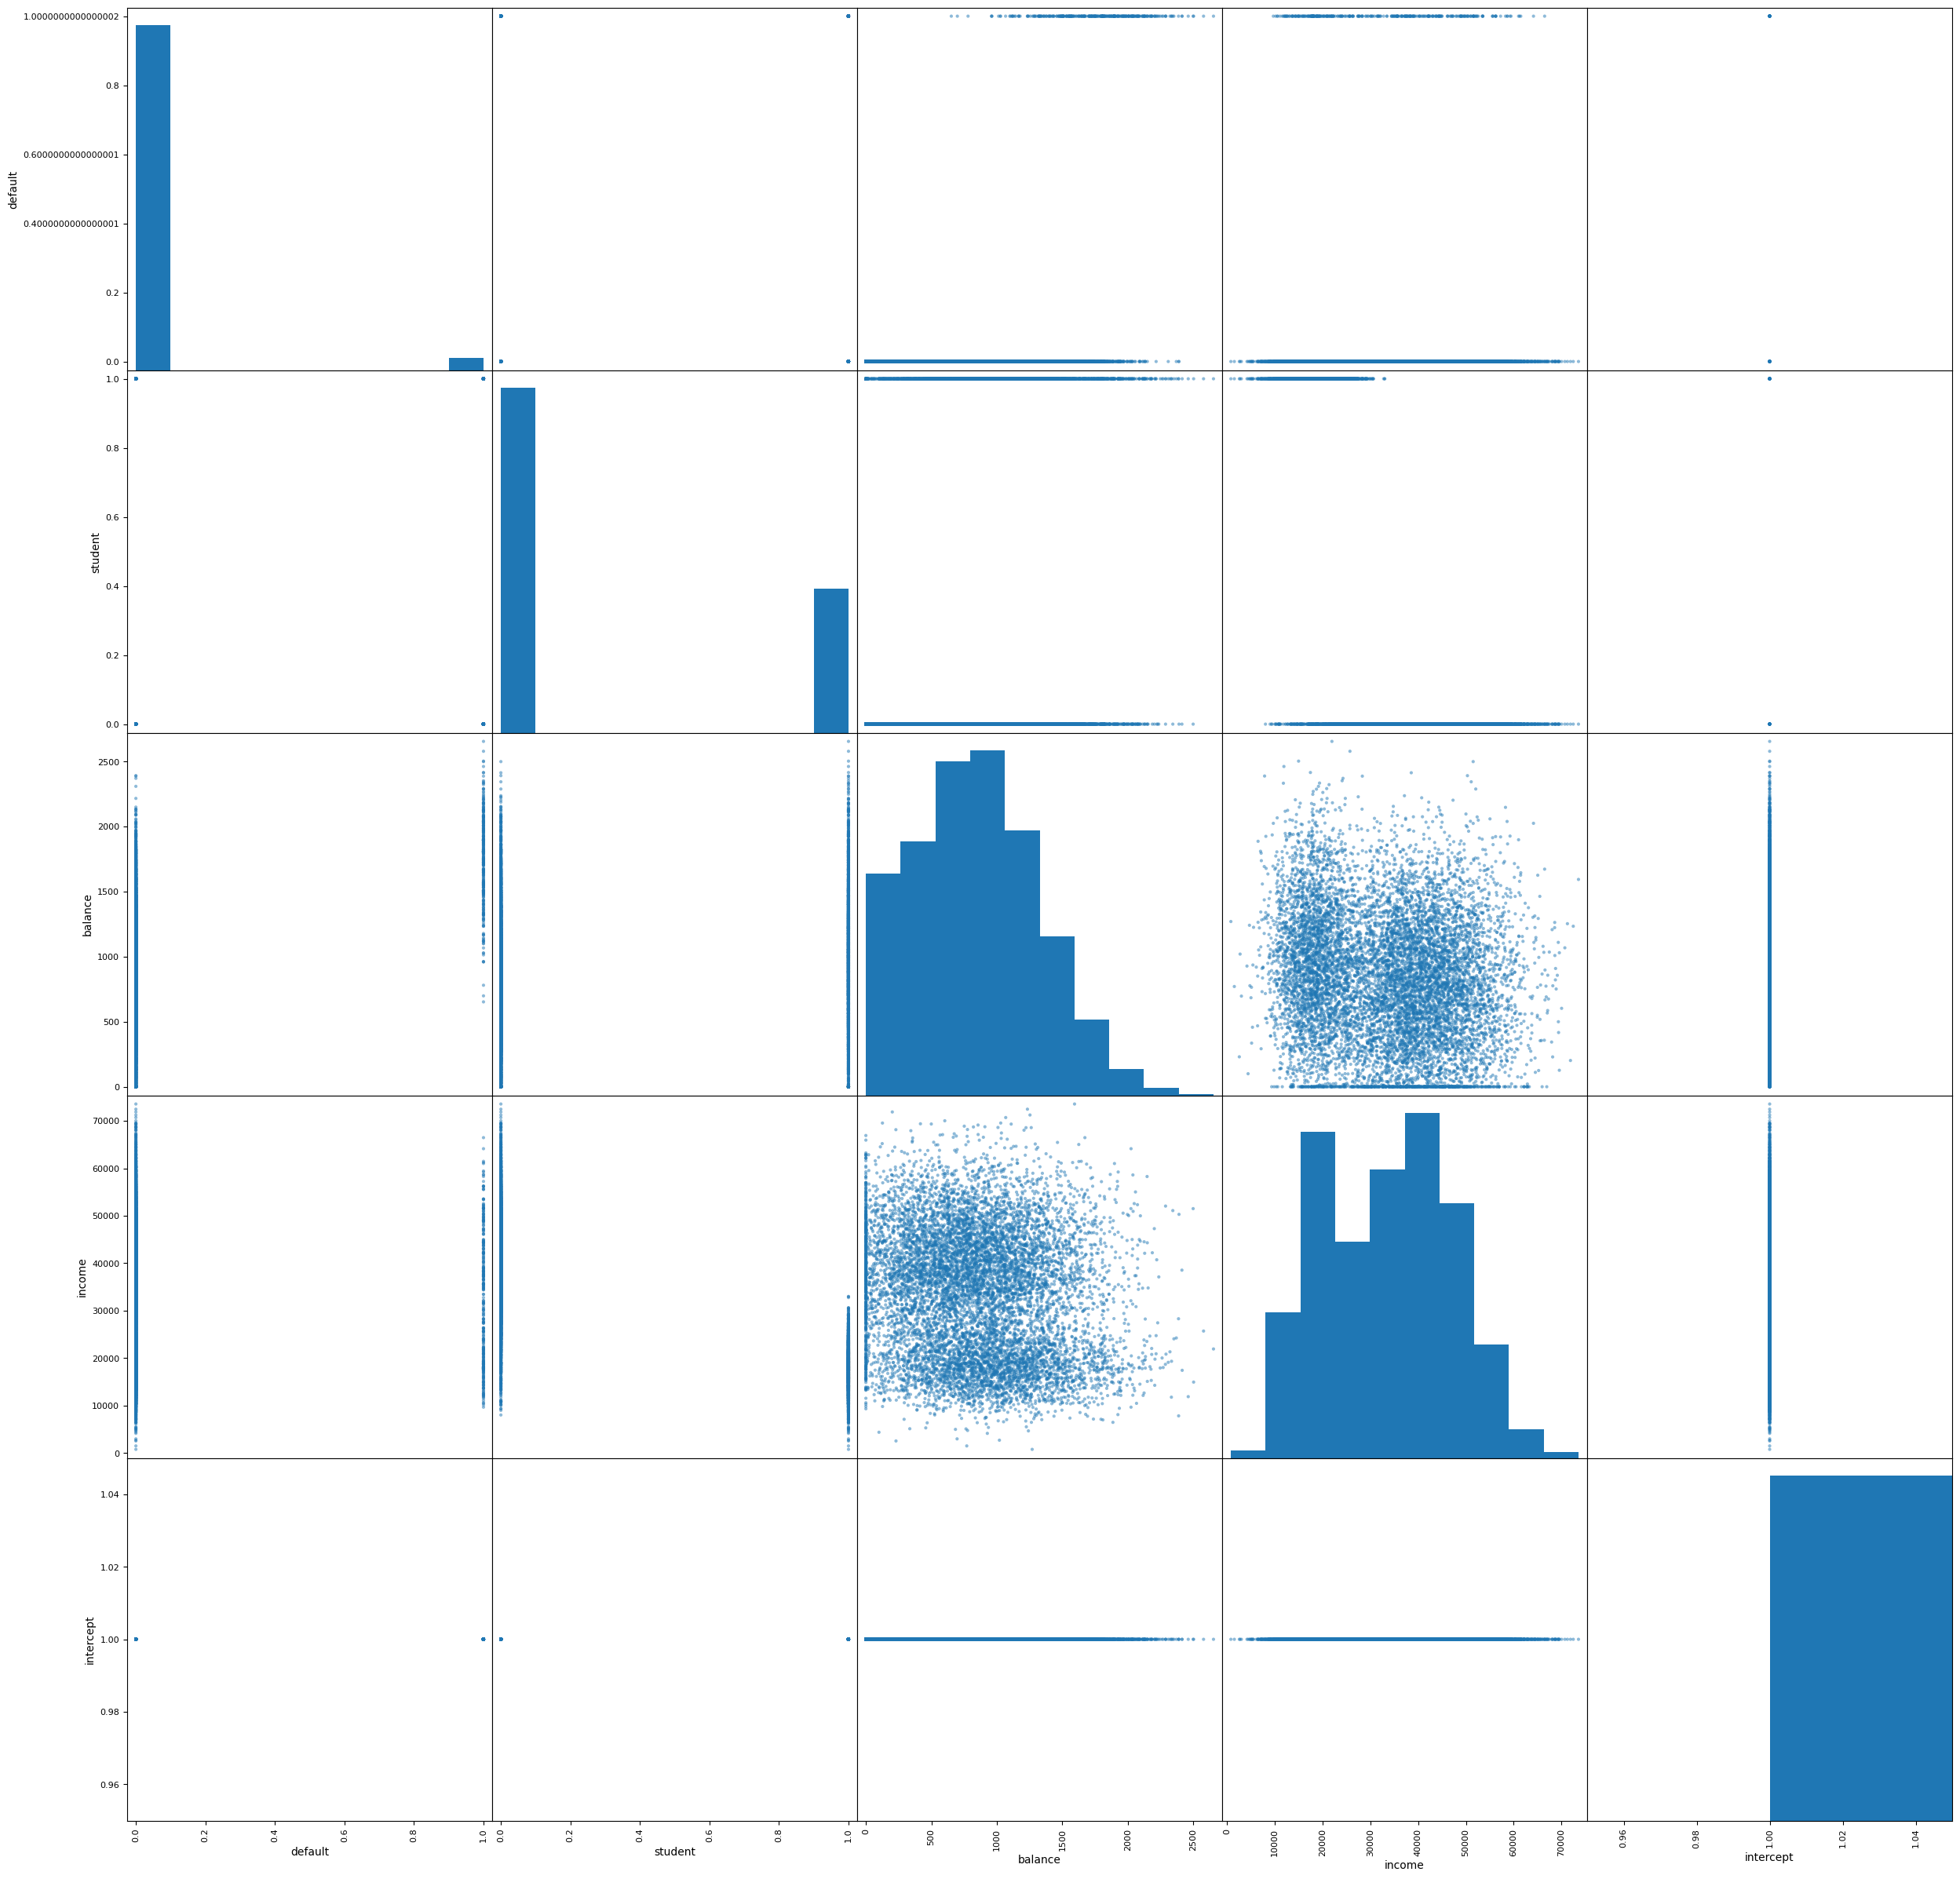

In [25]:
pd.plotting.scatter_matrix(default, figsize=(30,30))
plt.show()

--> Vermutlich kein linearer Zusammenhang, der sich nicht durch lineare Entscheidungsgrenzen abbilden lässt

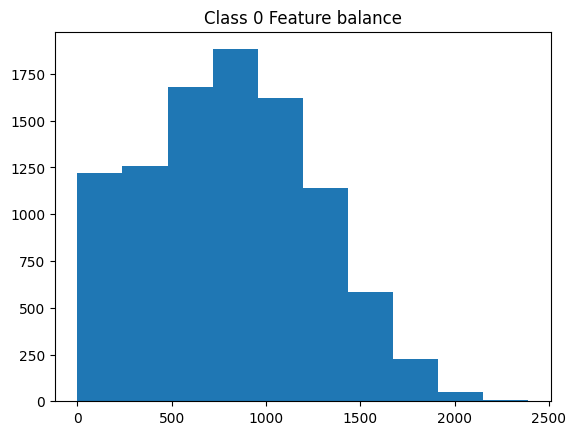

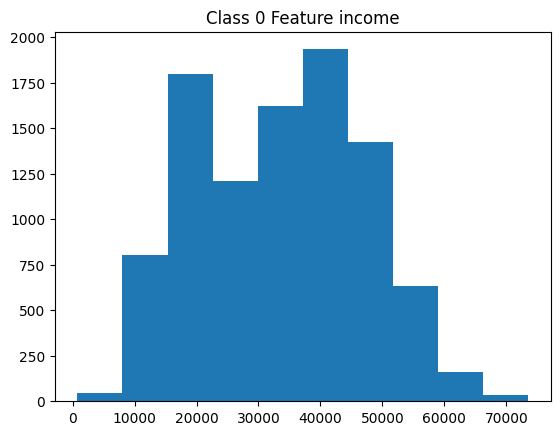

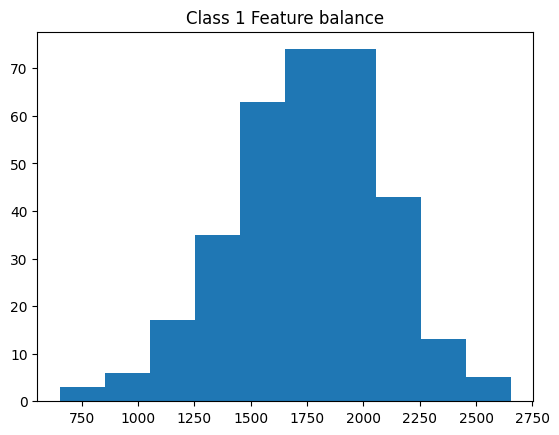

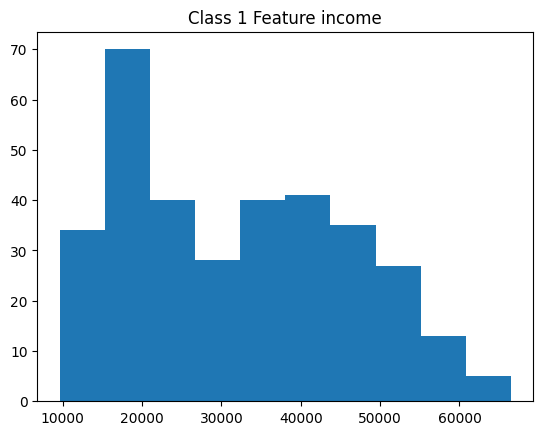

In [26]:
for i in [0,1]:
    for col in ['balance', 'income']:
        plt.hist(default.loc[default.default == i, col])
        plt.title(f'Class {i} Feature {col}')
        plt.show()

---

# Übungsaufgaben

Sklearn bietet auch die Möglichkeit kleine Datensätze direkt über das Paket herunterzuladen, beispielsweise den Datensatz zur Klassifizierung von Schwertlilien, welchen wir schon in der ersten Vorlesung gesehen haben.

In [27]:
from sklearn.datasets import load_iris
data = load_iris()

Nutzen Sie den Irisdatensatz, um die folgenden Aufgaben zu lösen.

## Aufgabe 1

Teilen Sie die Daten in einen Test- und einen Trainingsdatensatz mit der [`train_test_split`]("https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html") Funktion aus sklearn auf. Nutzen Sie ein Verhältnis von 80% Traingsdaten und 20% Testdaten.

In [28]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = data['data'] 
y = data['target']

In [31]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=4)

In [35]:
XTrain.shape

(120, 4)

In [36]:
XTest.shape

(30, 4)

## Aufgabe 2

Trainieren Sie jeweils einen LDA- und KNN-Klassifikator auf Basis der Trainingsdaten. Bewerten Sie die Ergebnisse anhand der Confusion Matrix auf Basis der Test- bzw. Traingsdaten. Welcher Klassifikator schneidet am besten ab?

In [40]:
ldaClf = LinearDiscriminantAnalysis()
ldaClf.fit(XTrain, yTrain)
print("Testscore:"+str(ldaClf.score(XTest, yTest)))

Testscore:0.9333333333333333


In [42]:
print("Trainingsscore:"+str(ldaClf.score(XTrain, yTrain)))


Trainingsscore:0.9916666666666667


array([[16,  0,  0],
       [ 0,  4,  1],
       [ 0,  1,  8]], dtype=int64)

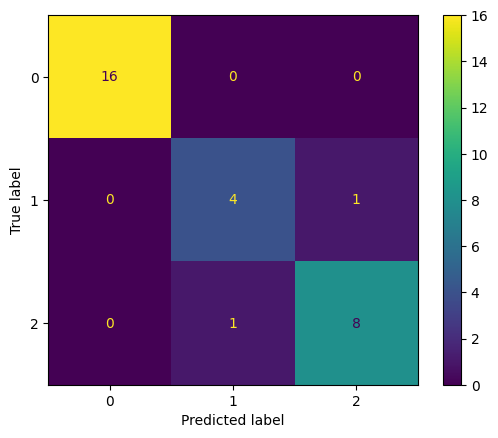

In [55]:
from  sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
confMatLda = confusion_matrix(yTest, ldaClf.predict(XTest),labels=[0,1,2])
cm_display= ConfusionMatrixDisplay(confMatLda).plot()
confMatLda

In [44]:
knnClf = KNeighborsClassifier(n_neighbors=7)
knnClf.fit(XTrain, yTrain)
knnClf.score(XTest, yTest)

0.9666666666666667

In [45]:
confMatKnn = confusion_matrix(yTest, knnClf.predict(XTest))
confMatKnn

array([[16,  0,  0],
       [ 0,  4,  1],
       [ 0,  0,  9]], dtype=int64)

--> Die Diagonale von oben links nach unten rechts zusammen rechnen (=True Positives) und durch die Gesamtanzahl teilen--> Accuracy

Der Testscore von KNN ist besser.

## Aufgabe 3

Betrachten Sie nun nochmals die  Modelle, um die Kreditausfallwahrscheinlichkeit vorherzusagen (logistische Regression / LDA / KNN). Trainieren Sie diese erneut, aber mit der Hilfe eines Train Test Splits. Berechenen Sie zu diesen neuen Modellen jeweils die Metriken Recall, Precision und F1 Score. Nutzen Sie dazu die Funktionen von Sklearn. Welches Modell ist Ihrer Meinung nach das Beste?

In [59]:
from sklearn.metrics import recall_score, precision_score, f1_score

In [68]:
XTrain_default, XTest_default, yTrain_default, yTest_default = train_test_split(default.drop('default', axis=1), default.default, test_size=0.2, random_state=5)

In [69]:
defaultAllMod = sm.Logit(yTrain_default, XTrain_default.loc[:,['student', 'balance', 'income', 'intercept']])
defaultAllRes = defaultAllMod.fit()
print(f'Recall: {recall_score(yTest_default, defaultAllRes.predict(XTest_default).round())}')
print(f'Precision: {precision_score(yTest_default, defaultAllRes.predict(XTest_default).round())}')
print(f'F1: {f1_score(yTest_default, defaultAllRes.predict(XTest_default).round())}')

Optimization terminated successfully.
         Current function value: 0.080028
         Iterations 10
Recall: 0.3484848484848485
Precision: 0.7419354838709677
F1: 0.4742268041237113


In [70]:
ldaClf = LinearDiscriminantAnalysis()
ldaClf.fit(XTrain_default, yTrain_default)
print(f'Recall: {recall_score(yTest_default, ldaClf.predict(XTest_default))}')
print(f'Precision: {precision_score(yTest_default, ldaClf.predict(XTest_default))}')
print(f'F1: {f1_score(yTest_default, ldaClf.predict(XTest_default))}')

Recall: 0.24242424242424243
Precision: 0.8
F1: 0.37209302325581395


In [71]:
knnClf = KNeighborsClassifier(n_neighbors=3)
knnClf.fit(XTrain_default, yTrain_default)
print(f'Recall: {recall_score(yTest_default, knnClf.predict(XTest_default))}')
print(f'Precision: {precision_score(yTest_default, knnClf.predict(XTest_default))}')
print(f'F1: {f1_score(yTest_default, knnClf.predict(XTest_default))}')

Recall: 0.25757575757575757
Precision: 0.5151515151515151
F1: 0.3434343434343434
